In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm



In [3]:
merged = pd.read_csv('merged.csv', index_col = 'date', parse_dates = True)


In [4]:
merged

,PERMNO,SHRCD,PERMCO,PRC,RET,SHROUT,log1pRET,sumlog1pRET,RET12,Q10_RET12
date,,,,,,,,,,
1988-03-31,10001,11,7953,6.12500,-0.076296,992.0,-0.079364,0.029884,0.030335,7.0
1988-04-30,10001,11,7953,-6.31250,0.030612,992.0,0.030153,0.100042,0.105218,8.0
1988-05-31,10001,11,7953,-6.43750,0.019802,992.0,0.019608,0.193759,0.213804,7.0
1988-06-30,10001,11,7953,6.25000,-0.012039,992.0,-0.012112,0.131497,0.140535,7.0
1988-07-31,10001,11,7953,-6.43750,0.030000,992.0,0.029559,0.140002,0.150276,8.0
...,...,...,...,...,...,...,...,...,...,...
2019-08-31,93436,11,53453,225.61000,-0.066222,179127.0,-0.068517,-0.290492,-0.252104,2.0
2019-09-30,93436,11,53453,240.87000,0.067639,180000.0,0.065450,-0.094603,-0.090266,3.0
2019-10-31,93436,11,53453,314.92001,0.307427,180245.0,0.268061,-0.068712,-0.066405,3.0


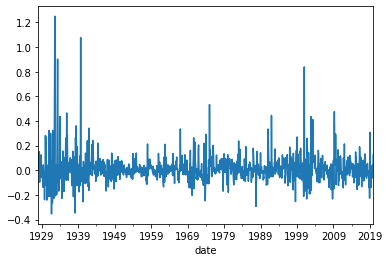

In [5]:

# calculate and visualize the characteristics of top and bottom portfolios
# mean of bottom portfolio
merged[merged['Q10_RET12']== 0].groupby('date')['RET'].mean().plot()

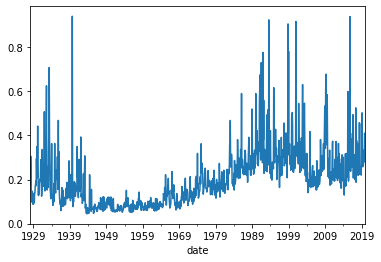

In [6]:
# standard deviation of bottom portfolio
merged[merged['Q10_RET12']== 0].groupby('date')['RET'].std().plot()

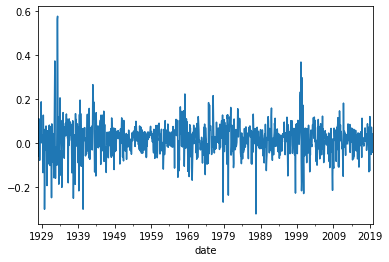

In [7]:
# mean of top portfolio
merged[merged['Q10_RET12']== 9].groupby('date')['RET'].mean().plot()

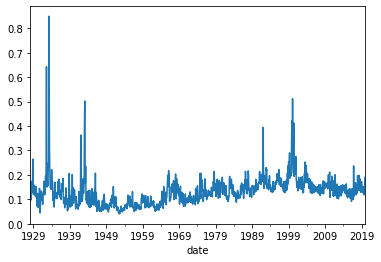

In [8]:
# standard deviation of top portfolio
merged[merged['Q10_RET12']== 9].groupby('date')['RET'].std().plot()

In [9]:
# Calculate characteristics of all portfolios in all months
merged_gbq=merged.groupby('Q10_RET12').describe()
port_ret=merged_gbq['RET']
port_ret

,count,mean,std,min,25%,50%,75%,max
Q10_RET12,,,,,,,,
0.0,282920.0,0.012976,0.298614,-0.993600,-0.120000,-0.011012,0.090909,19.000000
1.0,290161.0,0.010488,0.198716,-0.981295,-0.081081,0.000000,0.076271,13.495050
2.0,290824.0,0.010928,0.168665,-0.926702,-0.063670,0.000000,0.067708,24.000000
3.0,291147.0,0.011696,0.141029,-0.952703,-0.052778,0.000000,0.063636,5.562500
4.0,291161.0,0.012542,0.129640,-0.924577,-0.047210,0.003497,0.061350,7.480000
5.0,290528.0,0.013383,0.123327,-0.916667,-0.044118,0.005852,0.061303,4.018182
6.0,290194.0,0.014091,0.125601,-0.959091,-0.043716,0.006897,0.062780,10.344000
7.0,289418.0,0.015084,0.127644,-0.950000,-0.045373,0.007334,0.065897,6.166667
8.0,288079.0,0.015783,0.138615,-0.937500,-0.051432,0.007112,0.072165,6.908072


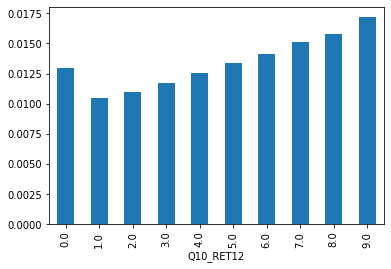

In [10]:
# this chart shows the mean return of 10 portfolios in all months
port_ret['mean'].plot(kind = 'bar')

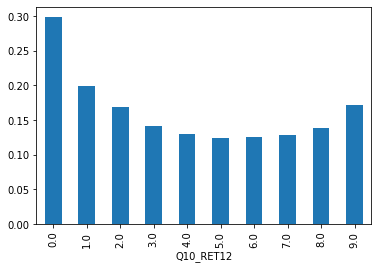

In [11]:
# this chart shows the standard deviation of 10 portfolios in all monthes
port_ret['std'].plot(kind = 'bar')

In [12]:
ff = pd.read_csv('ff.csv', index_col = 'Date', parse_dates = True)
ff['Mkt-RF'] = pd.to_numeric(ff['Mkt-RF'], errors = 'coerce')
ff['RF'] = pd.to_numeric(ff['RF'], errors = 'coerce')
ff['Mkt'] = ff['Mkt-RF'] + ff['RF']
ff.index = pd.to_datetime(ff.index, format='%Y%m') + pd.offsets.MonthEnd(0)
ff.reset_index(inplace = True)
ff.rename(columns={'Mkt-RF' : 'Mkt_RF','Date': 'date'}, inplace=True)
ff

,date,Mkt_RF,SMB,HML,RF,Mkt
0,1926-07-31,2.96,-2.30,-2.87,0.22,3.18
1,1926-08-31,2.64,-1.40,4.19,0.25,2.89
2,1926-09-30,0.36,-1.32,0.01,0.23,0.59
3,1926-10-31,-3.24,0.04,0.51,0.32,-2.92
4,1926-11-30,2.53,-0.20,-0.35,0.31,2.84
...,...,...,...,...,...,...
1117,2019-08-31,-2.58,-2.41,-4.99,0.16,-2.42
1118,2019-09-30,1.44,-0.90,6.71,0.18,1.62
1119,2019-10-31,2.06,0.25,-2.07,0.15,2.21
1120,2019-11-30,3.87,0.87,-1.86,0.12,3.99


In [13]:
# Describe Strategy - prepare 
port = pd.DataFrame()
portfolios1 = merged.groupby(['date', 'Q10_RET12'])[['RET']].mean().unstack()
portfolios1.columns = ['RET_' + str(i) for i in range(10)]
port['strategy_ret']= (portfolios1['RET_9'] -  portfolios1['RET_0'])*100
port.reset_index(inplace = True)
port['strategy_excess'] = port['strategy_ret'] - ff['RF']
portfolios2 = pd.merge(ff, port[['date','strategy_ret','strategy_excess']],on = 'date')
portfolios2['log_mktrf'] = np.log(portfolios2['Mkt_RF']/100 + 1)
portfolios2['log_strategyrf'] = np.log(portfolios2['strategy_excess']/100 + 1)
portfolios2['log_mkt'] = np.log(portfolios2['Mkt']/100 + 1)
portfolios2['log_strategy'] = np.log(portfolios2['strategy_ret']/100 + 1)
portfolios2.set_index('date', inplace =True)

In [14]:
port

,date,strategy_ret,strategy_excess
0,1928-02-29,-7.213916,-7.433916
1,1928-03-31,5.433933,5.183933
2,1928-04-30,-6.128900,-6.358900
3,1928-05-31,-10.353505,-10.673505
4,1928-06-30,1.910393,1.600393
...,...,...,...
1098,2019-08-31,4.227480,4.117480
1099,2019-09-30,-8.108368,-8.218368
1100,2019-10-31,6.493778,6.373778
1101,2019-11-30,2.770538,2.630538


In [15]:
portfolios1

,RET_0,RET_1,RET_2,RET_3,RET_4,RET_5,RET_6,RET_7,RET_8,RET_9
date,,,,,,,,,,
1928-02-29,0.013518,-0.032255,-0.046103,0.005085,-0.017139,-0.026459,-0.031474,-0.025070,-0.042442,-0.058621
1928-03-31,0.057636,0.072778,0.059553,0.059536,0.052894,0.073901,0.055984,0.070600,0.122978,0.111975
1928-04-30,0.142321,0.184590,0.107077,0.147590,0.066971,0.075162,0.027398,0.051557,0.032474,0.081032
1928-05-31,0.151237,-0.014944,0.049685,0.006897,0.010619,0.017688,0.046769,0.018424,0.070917,0.047702
1928-06-30,-0.096420,-0.084013,-0.053595,-0.080872,-0.052946,-0.067429,-0.059976,-0.062516,-0.061097,-0.077316
...,...,...,...,...,...,...,...,...,...,...
2019-08-31,-0.064556,-0.079765,-0.085219,-0.069547,-0.050976,-0.045273,-0.047509,-0.035419,-0.028836,-0.022282
2019-09-30,0.039333,0.044416,0.042847,0.054427,0.040213,0.043623,0.033062,0.023063,0.008876,-0.041750
2019-10-31,-0.048069,-0.011331,-0.008531,0.008869,0.011211,0.027207,0.009156,0.015086,0.010126,0.016869


In [16]:
portfolios2

,Mkt_RF,SMB,HML,RF,Mkt,strategy_ret,strategy_excess,log_mktrf,log_strategyrf,log_mkt,log_strategy
date,,,,,,,,,,,
1928-02-29,-1.70,-2.03,-0.69,0.33,-1.37,-7.213916,-7.433916,-0.017146,-0.077247,-0.013795,-0.074874
1928-03-31,8.81,-0.26,-1.20,0.29,9.10,5.433933,5.183933,0.084433,0.050540,0.087095,0.052914
1928-04-30,4.23,3.82,3.67,0.22,4.45,-6.128900,-6.358900,0.041430,-0.065701,0.043538,-0.063248
1928-05-31,1.52,2.98,-3.46,0.32,1.84,-10.353505,-10.673505,0.015086,-0.112872,0.018233,-0.109296
1928-06-30,-4.85,-3.50,-0.06,0.31,-4.54,1.910393,1.600393,-0.049716,0.015877,-0.046463,0.018924
...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,-2.58,-2.41,-4.99,0.16,-2.42,4.227480,4.117480,-0.026139,0.040350,-0.024498,0.041406
2019-09-30,1.44,-0.90,6.71,0.18,1.62,-8.108368,-8.218368,0.014297,-0.085758,0.016070,-0.084560
2019-10-31,2.06,0.25,-2.07,0.15,2.21,6.493778,6.373778,0.020391,0.061789,0.021859,0.062916


In [17]:
portfolios2['strategy_ret'].std()

8.397787105697274

Text(0, 0.5, 'Return')

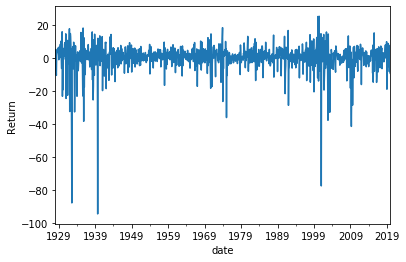

In [18]:
portfolios2['strategy_ret'].plot()
plt.ylabel('Return')

In [19]:
portfolios2['Mkt'].std()

5.34020269122724

Text(0, 0.5, 'Return')

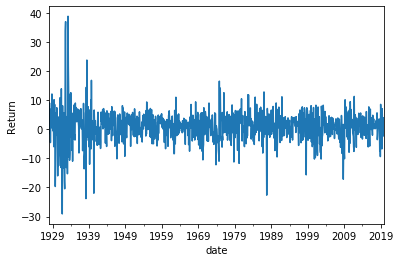

In [20]:
(portfolios2['Mkt']).plot()
plt.ylabel('Return')

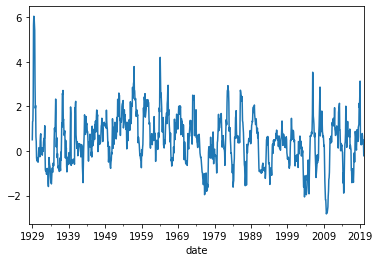

In [21]:
def SR(x):
    return np.sqrt(12) * np.mean(x) / np.std(x)
portfolios2['strategy_excess'].rolling(window = 12).apply(SR, raw = True).plot()



In [22]:
portfolios2['strategy_excess'].rolling(window = 12).apply(SR, raw = True).mean()

0.4742577251822589

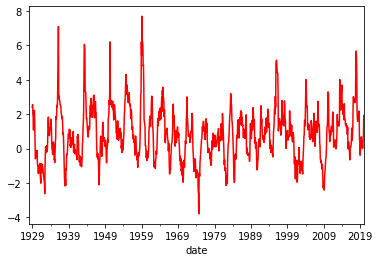

In [23]:
(portfolios2['Mkt_RF']).rolling(window = 12).apply(SR, raw = True).plot(color = 'red')

In [24]:
portfolios2['Mkt_RF'].rolling(window = 12).apply(SR, raw = True).mean()

0.8223357143290584

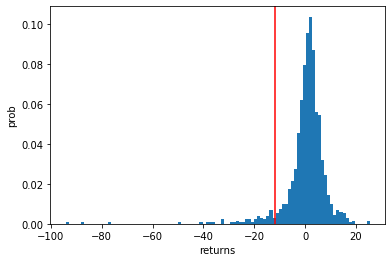

In [25]:
var_95percent_st = np.percentile(port['strategy_ret'], 5)
var_95percent_st_sorted = sorted(port['strategy_ret'])
plt.hist(var_95percent_st_sorted, density = True, bins = 100)
plt.axvline(x=var_95percent_st, color='r', linestyle='-',label="var_95percent_st".format(var_95percent_st))
plt.xlabel('returns')
plt.ylabel('prob')
plt.show()

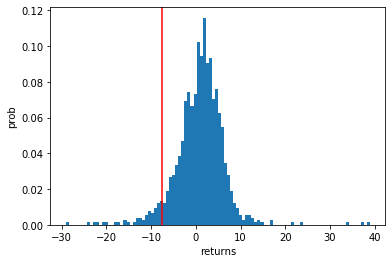

In [26]:
var_95percent_m = np.percentile(portfolios2['Mkt'], 5)
var_95percent_m_sorted = sorted(portfolios2['Mkt'])
plt.hist(var_95percent_m_sorted, density = True, bins = 100)
plt.axvline(x=var_95percent_m, color='r', linestyle='-',label="var_95percent_m".format(var_95percent_m))
plt.xlabel('returns')
plt.ylabel('prob')
plt.show()

In [27]:
var_95percent_m

-7.5

In [28]:
portfolios2

,Mkt_RF,SMB,HML,RF,Mkt,strategy_ret,strategy_excess,log_mktrf,log_strategyrf,log_mkt,log_strategy
date,,,,,,,,,,,
1928-02-29,-1.70,-2.03,-0.69,0.33,-1.37,-7.213916,-7.433916,-0.017146,-0.077247,-0.013795,-0.074874
1928-03-31,8.81,-0.26,-1.20,0.29,9.10,5.433933,5.183933,0.084433,0.050540,0.087095,0.052914
1928-04-30,4.23,3.82,3.67,0.22,4.45,-6.128900,-6.358900,0.041430,-0.065701,0.043538,-0.063248
1928-05-31,1.52,2.98,-3.46,0.32,1.84,-10.353505,-10.673505,0.015086,-0.112872,0.018233,-0.109296
1928-06-30,-4.85,-3.50,-0.06,0.31,-4.54,1.910393,1.600393,-0.049716,0.015877,-0.046463,0.018924
...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,-2.58,-2.41,-4.99,0.16,-2.42,4.227480,4.117480,-0.026139,0.040350,-0.024498,0.041406
2019-09-30,1.44,-0.90,6.71,0.18,1.62,-8.108368,-8.218368,0.014297,-0.085758,0.016070,-0.084560
2019-10-31,2.06,0.25,-2.07,0.15,2.21,6.493778,6.373778,0.020391,0.061789,0.021859,0.062916


In [29]:
#Table of CAPM and factor models 

In [54]:
portfolios2[['strategy_ret','Mkt_RF','SMB','HML']].corr()

,strategy_ret,Mkt_RF,SMB,HML
strategy_ret,1.000000,-0.282137,-0.302015,-0.396063
Mkt_RF,-0.282137,1.000000,0.323952,0.235104
SMB,-0.302015,0.323952,1.000000,0.125598
HML,-0.396063,0.235104,0.125598,1.000000


In [55]:
CAPM_model = sm.ols(formula='strategy_ret ~ Mkt_RF', data=portfolios2)

In [56]:
factor=portfolios2[['strategy_ret','Mkt_RF','SMB','HML']]

In [57]:
CAPM_model.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           strategy_ret   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     95.22
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           1.24e-21
Time:                        18:01:14   Log-Likelihood:                -3866.0
No. Observations:                1103   AIC:                             7736.
Df Residuals:                    1101   BIC:                             7746.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7281      0.244      2.978      0.003       0.248       1.208
Mkt_RF        -0.4428      0.045     -9.758      0.000      -0.532      -0.354
==============================================================================
Omnibus:                      879.870   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35770.412
Skew:                          -3.315   Prob(JB):                         0.00
Kurtosis:                      30.099   Cond. No.                         5.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
factor

,strategy_ret,Mkt_RF,SMB,HML
date,,,,
1928-02-29,-7.213916,-1.70,-2.03,-0.69
1928-03-31,5.433933,8.81,-0.26,-1.20
1928-04-30,-6.128900,4.23,3.82,3.67
1928-05-31,-10.353505,1.52,2.98,-3.46
1928-06-30,1.910393,-4.85,-3.50,-0.06
...,...,...,...,...
2019-08-31,4.227480,-2.58,-2.41,-4.99
2019-09-30,-8.108368,1.44,-0.90,6.71
2019-10-31,6.493778,2.06,0.25,-2.07


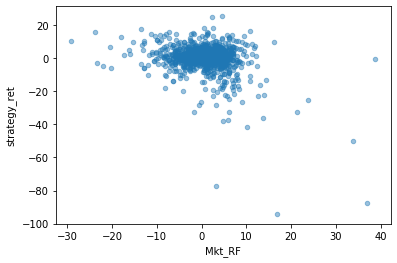

In [60]:
factor.plot.scatter(x='Mkt_RF', y='strategy_ret', alpha=0.4523) #

In [61]:
portfolios2

,Mkt_RF,SMB,HML,RF,Mkt,strategy_ret,strategy_excess,log_mktrf,log_strategyrf,log_mkt,log_strategy,cum_mom
date,,,,,,,,,,,,
1928-02-29,-1.70,-2.03,-0.69,0.33,-1.37,-7.213916,-7.433916,-0.017146,-0.077247,-0.013795,-0.074874,-7.213916
1928-03-31,8.81,-0.26,-1.20,0.29,9.10,5.433933,5.183933,0.084433,0.050540,0.087095,0.052914,-1.779984
1928-04-30,4.23,3.82,3.67,0.22,4.45,-6.128900,-6.358900,0.041430,-0.065701,0.043538,-0.063248,-7.908884
1928-05-31,1.52,2.98,-3.46,0.32,1.84,-10.353505,-10.673505,0.015086,-0.112872,0.018233,-0.109296,-18.262388
1928-06-30,-4.85,-3.50,-0.06,0.31,-4.54,1.910393,1.600393,-0.049716,0.015877,-0.046463,0.018924,-16.351995
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,-2.58,-2.41,-4.99,0.16,-2.42,4.227480,4.117480,-0.026139,0.040350,-0.024498,0.041406,494.682150
2019-09-30,1.44,-0.90,6.71,0.18,1.62,-8.108368,-8.218368,0.014297,-0.085758,0.016070,-0.084560,486.573782
2019-10-31,2.06,0.25,-2.07,0.15,2.21,6.493778,6.373778,0.020391,0.061789,0.021859,0.062916,493.067560


In [62]:
sm.ols('strategy_ret ~ Mkt_RF + SMB + HML', data=portfolios2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           strategy_ret   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     113.5
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           4.90e-64
Time:                        18:01:29   Log-Likelihood:                -3762.9
No. Observations:                1103   AIC:                             7534.
Df Residuals:                    1099   BIC:                             7554.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9864      0.224      4.412      0.000       0.548       1.425
Mkt_RF        -0.2080      0.045     -4.655      0.000      -0.296      -0.120
SMB           -0.5692      0.073     -7.766      0.000      -0.713      -0.425
HML           -0.8121      0.065    -12.435      0.000      -0.940      -0.684
==============================================================================
Omnibus:                      684.142   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17521.581
Skew:                          -2.394   Prob(JB):                         0.00
Kurtosis:                      21.929   Cond. No.                         5.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

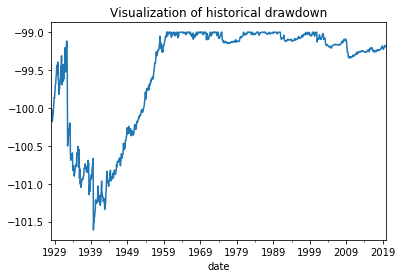

In [70]:
# Visualization of historical drawdown 
portfolios2['cum_mom'] = portfolios2['strategy_ret'].cumsum()
cum_mom = portfolios2['cum_mom']
running_max = np.maximum.accumulate(cum_mom)
running_max[running_max < 100] = 100
drawdown = (cum_mom)/running_max - 100
plt.title('Visualization of historical drawdown')
drawdown.plot()


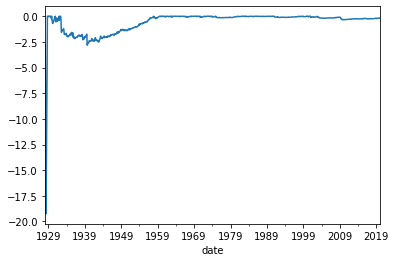

In [72]:
# Test for normality(Shapiro-Wilk test)
from scipy import stats
p_value = stats.shapiro(portfolios2['strategy_ret'].dropna())[1]
if p_value <=0.05:
    print('Null hypothesis of normality is rejected.')
else:
    print('Null hypothesis of normality is not rejected.')

Null hypothesis of normality is rejected.
